# Main

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import re as re
import time
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Webscrapping

### Importing BBC webscrapping

In [2]:
import src.BBC_webscrapping as bbc

In [ ]:
df_bbc_russia = bbc.keyword('Russia',200)
df_bbc_china = bbc.keyword('China',200)

### Importing CNN webscrapping

In [3]:
import src.CNN_webscrapping as cnn

In [ ]:
df_cnn_russia = cnn.keyword('Russia',200)
df_cnn_china = cnn.keyword('China',200)

### Importing Peoples's  Daily Online

In [4]:
import src.peoples_webscrapping as pdo

In [ ]:
df_united_states = pdo.keyword('United States',60)
df_usa = pdo.keyword('USA',60)
df_uk = pdo.keyword('UK',60)
df_united_kingdom = pdo.keyword('United Kingdom',60)

In [ ]:
df_pd_us=pd.concat([df_united_states,df_usa])
df_pd_uk=pd.concat([df_uk,df_united_kingdom])

### Importing RT webscrapping

In [5]:
import src.RT_webscrapping as rt

In [ ]:
df_united_states = rt.keyword('United States',100)
df_usa = rt.keyword('USA',100)
df_united_kingdom = rt.keyword('United Kingdom',100)
df_uk = rt.keyword('uk',100)

In [ ]:
df_rt_us= pd.concat([df_united_states,df_usa])
df_rt_uk=pd.concat([df_united_kingdom,df_uk])

### - not required- Saving raw data into CSV 

In [ ]:
df_bbc_china.to_csv('data/raw/bbc_china.csv',index=False) 
df_bbc_russia.to_csv('data/raw/bbc_russia.csv',index=False)
df_cnn_china.to_csv('data/raw/cnn_china.csv',index=False)
df_cnn_russia.to_csv('data/raw/cnn_russia.csv',index=False)
df_pd_us.to_csv('data/raw/pdo_united_states.csv',index=False)
df_pd_uk.to_csv('data/raw/pdo_united_kingdom.csv',index=False) 
df_rt_us.to_csv('data/raw/rt_united_states.csv',index=False)  
df_rt_uk.to_csv('data/raw/rt_united_kingdom.csv',index=False)  

## Natural Languaje, Subjectivity and Polarity analysis

### Importing functions

In [6]:
import src.NLTK_analysis as nk

### - Not required - Importing raw files

In [7]:
df_bbc_china=pd.read_csv('data/raw/bbc_china.csv')
df_bbc_russia=pd.read_csv('data/raw/bbc_russia.csv')
df_cnn_china=pd.read_csv('data/raw/cnn_china.csv')
df_cnn_russia=pd.read_csv('data/raw/cnn_russia.csv')
df_pd_us=pd.read_csv('data/raw/pdo_united_states.csv')
df_pd_uk=pd.read_csv('data/raw/pdo_united_kingdom.csv')
df_rt_us=pd.read_csv('data/raw/rt_united_states.csv')
df_rt_uk=pd.read_csv('data/raw/rt_united_kingdom.csv')

### Applying to BBC

- China

In [8]:
df_bbc_china = nk.preprocess(df_bbc_china)
df_bbc_china=nk.add_column(df_bbc_china,'source','bbc')
df_bbc_china=nk.add_column(df_bbc_china,'topic','china')
df_bbc_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
38,Edinburgh Zoo's giant pandas could return to C...,ReadsScotlandScotland PoliticsScotland Busines...,https://www.bbc.co.uk/news/uk-scotland-edinbur...,4,1,2023,"[pandas, giant, zoo, china, tian, yang, guang,...",0.741991,0.049026,4/1/2023,bbc,china


- Russia

In [9]:
df_bbc_russia = nk.preprocess(df_bbc_russia)
df_bbc_russia=nk.add_column(df_bbc_russia,'source','bbc')
df_bbc_russia=nk.add_column(df_bbc_russia,'topic','russia')
df_bbc_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
65,Ukraine war: Russia interrupts UN minute's sil...,Ukraine war: Russia interrupts UN minute´s sil...,https://www.bbc.co.uk/news/world-europe-64766558,24,2,2023,"[ukraine, minute, watch, war, days, interrupts...",0.338889,-0.188889,24/2/2023,bbc,russia


### Applying to CNN

- China

In [10]:
df_cnn_china = nk.preprocess(df_cnn_china)
df_cnn_china=nk.add_column(df_cnn_china,'source','cnn')
df_cnn_china=nk.add_column(df_cnn_china,'topic','china')
df_cnn_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
47,China's new foreign minister warns of conflict...,China's new foreign minister warns of conflic...,https://www.cnn.com/2023/03/07/china/china-two...,7,3,2023,"[china, taiwan, qin, beijing, foreign, asia, s...",0.390087,0.075366,7/3/2023,cnn,china


- Russia

In [11]:
df_cnn_russia = nk.preprocess(df_cnn_russia)
df_cnn_russia=nk.add_column(df_cnn_russia,'source','cnn')
df_cnn_russia=nk.add_column(df_cnn_russia,'topic','russia')
df_cnn_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
91,Putin ally Lukashenko and Chinese leader Xi Ji...,Putin ally Lukashenko and Chinese leader Xi J...,https://www.cnn.com/2023/03/01/china/belarus-l...,1,3,2023,"[china, lukashenko, beijing, ukraine, xi, unit...",0.268751,0.080687,1/3/2023,cnn,russia


### Applying to People's Daily Online

- United States of America

In [12]:
df_pd_us = nk.preprocess(df_pd_us)
df_pd_us=nk.add_column(df_pd_us,'source','pdo')
df_pd_us=nk.add_column(df_pd_us,'topic','usa')
df_pd_us.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
20,U.S. consumer credit rises in January - People...,U.S. consumer credit rises in January (Xinhua)...,http://english.people.com.cn/n3/2023/0308/c900...,8,3,2023,"[consumer, credit, january, billion, increase,...",0.270909,-0.132727,8/3/2023,pdo,usa


- United Kingdom

In [13]:
df_pd_uk = nk.preprocess(df_pd_uk)
df_pd_uk=nk.add_column(df_pd_uk,'source','pdo')
df_pd_uk=nk.add_column(df_pd_uk,'topic','uk')
df_pd_uk.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
34,Chinese modernization provides a roadmap for C...,Chinese modernization provides a roadmap for C...,http://english.people.com.cn/n3/2023/0106/c900...,6,1,2023,"[china, ferguson, country, modernization, west...",0.388119,0.121737,6/1/2023,pdo,uk


### Applying to RT

- United States of America

In [14]:
df_rt_us = nk.preprocess(df_rt_us)
df_rt_us=nk.add_column(df_rt_us,'source','rt')
df_rt_us=nk.add_column(df_rt_us,'topic','usa')
df_rt_us.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
96,Two deaths and three derailments trigger rare ...,Two deaths and three derailments trigg...,https://www.rt.com/news/572653-ntsb-norfolk-so...,2023,3,8,"[norfolk, southern, safety, rail, operator, nt...",0.332883,0.075499,8/3/2023,rt,usa


- United Kingdom

In [15]:
df_rt_uk = nk.preprocess(df_rt_uk)
df_rt_uk=nk.add_column(df_rt_uk,'source','rt')
df_rt_uk=nk.add_column(df_rt_uk,'topic','uk')
df_rt_uk.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
15,New Zealand PM’s resignation might leave China...,New Zealand PM’s resignation might lea...,https://www.rt.com/news/570139-jacinda-ardern-...,2023,1,19,"[zealand, china, ardern, beijing, eyes, policy...",0.461537,0.07434,19/1/2023,rt,uk


### Saving all the DF's in one for visualisation

In [16]:
df_together = pd.concat([df_bbc_china,df_bbc_russia,df_cnn_china,df_cnn_russia,df_pd_us,df_pd_uk,df_rt_us, df_rt_uk])
df_together.to_csv('data/dfcomplete.csv',index=False)

### wordcloud

In [17]:
import src.wordcloud as wc

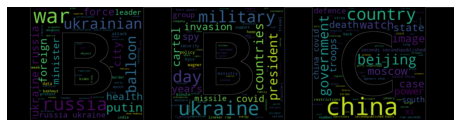

In [18]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china])
bbc_pic=wc.wordcloud(df_bbc,'uk.png')

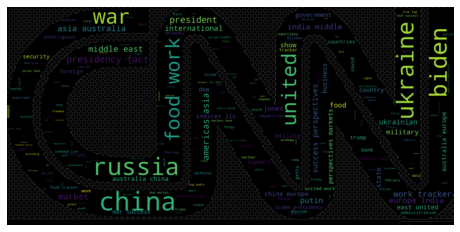

In [19]:
df_cnn=pd.concat([df_cnn_russia,df_cnn_china])
wc.wordcloud(df_cnn,'usa.png')

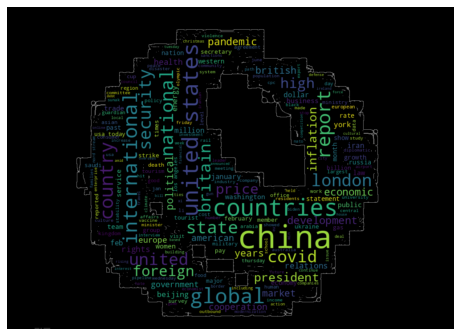

In [20]:
df_pd=pd.concat([df_pd_uk,df_pd_us])
wc.wordcloud(df_pd,'china.png')

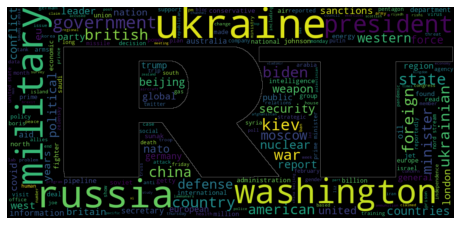

In [21]:
df_rt=pd.concat([df_rt_uk,df_rt_us])
wc.wordcloud(df_rt,'russia.png')

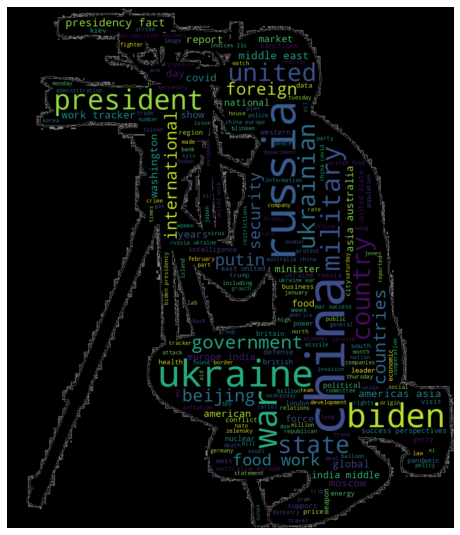

In [22]:
wc.wordcloud(df_together,'press.png')

### Create DF to save a list of most common words used by western and eastern for visualisation

In [23]:
df_words = nk.list_words(df_together)
df_west_words= pd.concat([nk.list_words(df_bbc),nk.list_words(df_cnn)])
df_east_words= pd.concat([nk.list_words(df_pd), nk.list_words(df_rt)])

In [24]:
df_words.to_csv ('data/words.csv',index=False)
df_west_words.to_csv('data/west_words.csv',index=False)
df_east_words.to_csv('data/east_words.csv',index=False)